In [16]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def load_top_results_per_algo(folder_path, sort_by="test", top_n=10):
    """
    Load all result CSV files from a folder and return the top-N performing results per algorithm.

    Parameters:
        folder_path (str): Path to the folder containing result CSV files.
        sort_by (str): Column name to sort by (default: 'test').
        top_n (int): Number of top rows to return per algorithm (default: 10).

    Returns:
        pd.DataFrame: Top-N rows per algorithm, sorted by `sort_by` metric.
    """
    all_results = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            # Parse theta column if present
            for col in df.columns:
                if "theta" in col and "parsed" not in col:
                    df["theta_parsed"] = df[col].apply(ast.literal_eval)
                    break

            all_results.append(df)

    if not all_results:
        raise ValueError("No CSV files found in the specified folder.")

    full_df = pd.concat(all_results, ignore_index=True)

    # Top-N results per algorithm
    top_per_alg = (
        full_df.sort_values(by=sort_by, ascending=True)  # lower is better if it's loss
        .groupby("alg")
        .head(top_n)
        .reset_index(drop=True)
    )

    return top_per_alg


In [21]:
best_df = load_top_results_per_algo("./results", sort_by="test")
print(best_df[["alg", "train", "test", "theta_parsed"]])

    alg          train          test  \
0   ABC -149375.857953 -12292.395885   
1   ABC -149375.857953 -12195.863251   
2   ABC -171447.332380 -12004.315125   
3   ABC -174292.168500 -11992.088404   
4   ABC -168465.010115 -11922.340681   
5   ABC -245708.446348 -11919.034351   
6   ABC -245708.446348 -11919.034351   
7   ABC -245708.446348 -11919.034351   
8   ABC -245708.446348 -11919.034351   
9   GWO -248083.098569 -11919.034351   
10  ABC -213242.701224 -11838.940357   
11  GWO -264166.206408 -11586.255946   
12  GWO -268764.149822 -11578.949619   
13  GWO -267669.478766 -11578.949619   
14  GWO -246736.145556 -11569.712166   
15  CAB -248573.955748 -11569.712166   
16  GWO -254497.624543 -11433.892309   
17  GWO -181834.854922 -11387.445207   
18  GWO -268764.149822 -11349.147431   
19  CAB -242078.454353 -11279.383669   
20  GWO -178765.610265 -10754.701692   
21  GWO -200805.864127 -10467.146548   
22  CAB -157440.894882  -8761.330822   
23  CAB -144312.970999  -7270.251419   


In [22]:
best_df

,alg,seed,train,test,"theta [d1, t1, a1, d2, t2, a2, shift]",pop_size,gens,time(seconds),theta_parsed,"theta [d1, t1, a1, d2, t2, a2]"
0,ABC,20,-149375.857953,-12292.395885,NaN,50,100,45.05,"[8.923393281518562, 2.6060520466980437, 0.1808...","[8.923393281518562, 2.6060520466980437, 0.1808..."
1,ABC,54,-149375.857953,-12195.863251,NaN,50,100,41.97,"[8.622192962604842, 2.9203351312574206, 0.1811...","[8.622192962604842, 2.9203351312574206, 0.1811..."
2,ABC,41,-171447.332380,-12004.315125,NaN,50,100,44.81,"[6.822643676912467, 2.5470268679200214, 0.1845...","[6.822643676912467, 2.5470268679200214, 0.1845..."
3,ABC,14,-174292.168500,-11992.088404,NaN,50,100,43.19,"[7.410335734425846, 2.788288751733171, 0.11731...","[7.410335734425846, 2.788288751733171, 0.11731..."
4,ABC,10,-168465.010115,-11922.340681,"[8.76640770305841, 2.8789083197209364, 0.13177...",30,100,26.35,"[8.76640770305841, 2.8789083197209364, 0.13177...",NaN
5,ABC,21,-245708.446348,-11919.034351,"[9.378045240254062, 2.6813698280779086, 0.0654...",100,50,43.38,"[9.378045240254062, 2.6813698280779086, 0.0654...",NaN
6,ABC,19,-245708.446348,-11919.034351,"[9.473676152733875, 2.532872173102554, 0.07017...",100,100,91.14,"[9.473676152733875, 2.532872173102554, 0.07017...",NaN
7,ABC,21,-245708.446348,-11919.034351,"[9.378045240254062, 2.6813698280779086, 0.0654...",100,100,93.76,"[9.378045240254062, 2.6813698280779086, 0.0654...",NaN
8,ABC,19,-245708.446348,-11919.034351,"[9.473676152733875, 2.532872173102554, 0.07017...",100,50,42.95,"[9.473676152733875, 2.532872173102554, 0.07017...",NaN
9,GWO,58,-248083.098569,-11919.034351,"[9.210167699344579, 3.0, 0.0721715174246248, 5...",100,100,32.94,"[9.210167699344579, 3.0, 0.0721715174246248, 5...",NaN


In [17]:
def plot_top_algo_comparison(top_df, metric="test"):
    """
    Visualize the top N results for each algorithm using a boxplot and stripplot.

    Parameters:
        top_df (pd.DataFrame): DataFrame of top-N results per algorithm.
        metric (str): Metric column to visualize (default: 'test').
    """
    if metric not in top_df.columns:
        raise ValueError(f"Metric '{metric}' not found in DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)
    sns.stripplot(x="alg", y=metric, data=top_df, color="black", size=5, jitter=True, alpha=0.7)

    plt.title(f"Top 10 {metric.capitalize()} Scores per Algorithm")
    plt.ylabel(f"{metric.capitalize()} Score")
    plt.xlabel("Algorithm")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/3406874041.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)


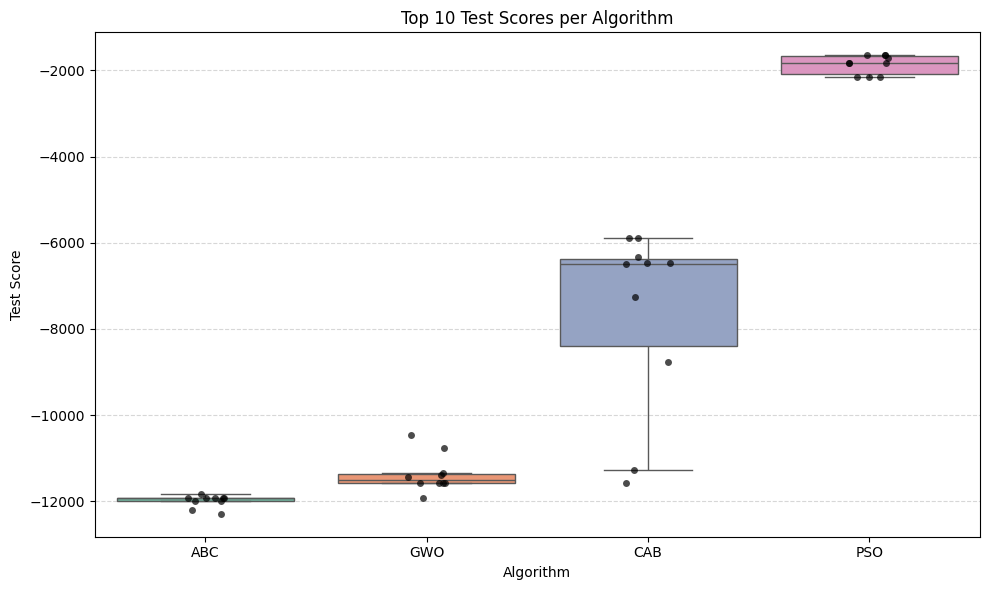

In [18]:
plot_top_algo_comparison(best_df, metric="test")

In [19]:
def plot_best_pop_and_gens(best_df):
    """
    Plot the best population size and generation count for each algorithm.

    Parameters:
        best_df (pd.DataFrame): Output from summarise_best_hyperparams_per_algo().
                                Must contain columns: 'alg', 'pop_size', 'gens'
    """
    if not {"alg", "pop_size", "gens"}.issubset(best_df.columns):
        raise ValueError("DataFrame must contain 'alg', 'pop_size', and 'gens' columns.")

    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(
        data=best_df,
        x="gens",
        y="pop_size",
        hue="alg",
        style="alg",
        s=150,
        palette="tab10"
    )

    for _, row in best_df.iterrows():
        plt.text(row["gens"] + 0.5, row["pop_size"] + 0.5, row["alg"], fontsize=10)

    plt.title("Best Population Size vs Generation Count per Algorithm")
    plt.xlabel("Number of Generations")
    plt.ylabel("Population Size")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Algorithm")
    plt.tight_layout()
    plt.show()
    

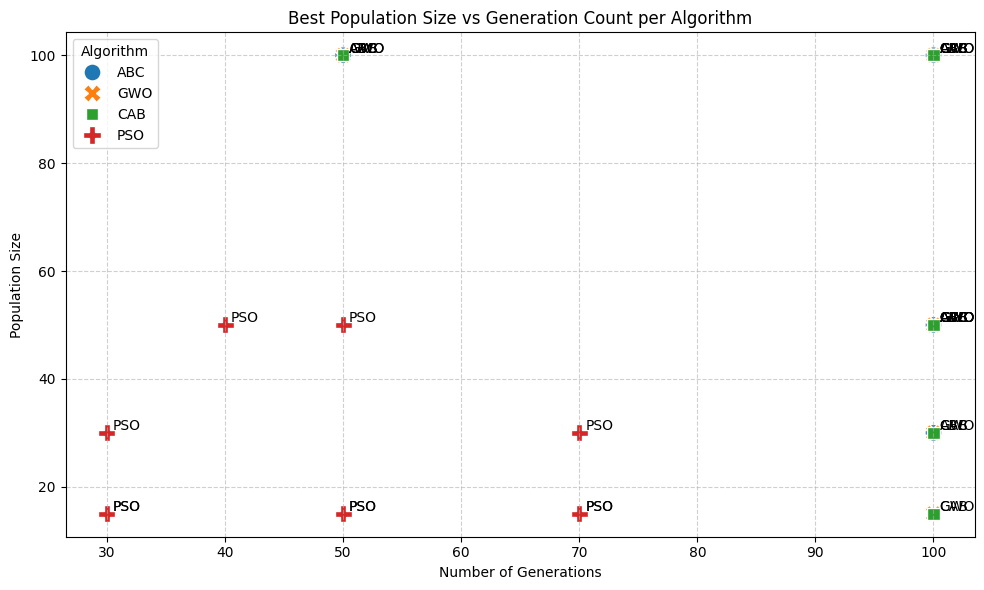

In [20]:
plot_best_pop_and_gens(best_df)